# MNIST 데이터셋

텐서플로우에서 하이레벨 API를 담당하고 있는 케라스를 불러옵니다.  
케라스에는 머신러닝 분야에서 유명한 데이터셋들 몇 종류가 내장되어있습니다.  
[tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)을 확인해 보세요.

In [16]:
from tensorflow import keras
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

첫번째 훈련 데이터입니다.  
28$\times$28 행렬이고 원소는 0부터 255까지의 정수이며 픽셀의 밝기를 나타냅니다.

In [17]:
import numpy as np
np.set_printoptions(linewidth=200,threshold=1000)

print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

matplotlib을 사용해서 이미지로 보죠.

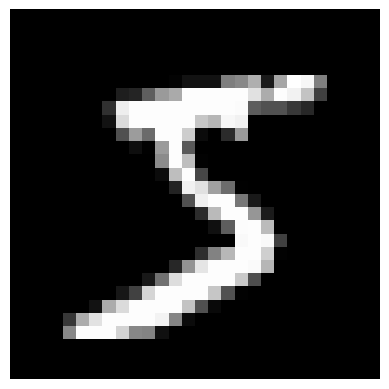

In [18]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(train_images[0], cmap=plt.cm.gray)
plt.show()

라벨입니다.

In [19]:
print(train_labels[0])

5


shape을 출력해보겠습니다.  
28$\times$28 해상도 훈련데이터 60,000장, 테스트 데이터 10,000장이 있습니다.  
밑바닥부터 시작하는 딥러닝에서는 훈련 데이터의 shape이 60,000$\times$1$\times$28$\times$28이었는데 여기서는 허당 채널이 없네요.  
나중에 CNN할때는 허당 채널을 만들어줘야 합니다.

In [20]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


plt.subplot을 이용해서 훈련 데이터의 앞 25장을 5$\times$5 모아찍기로 출력해 보겠습니다.

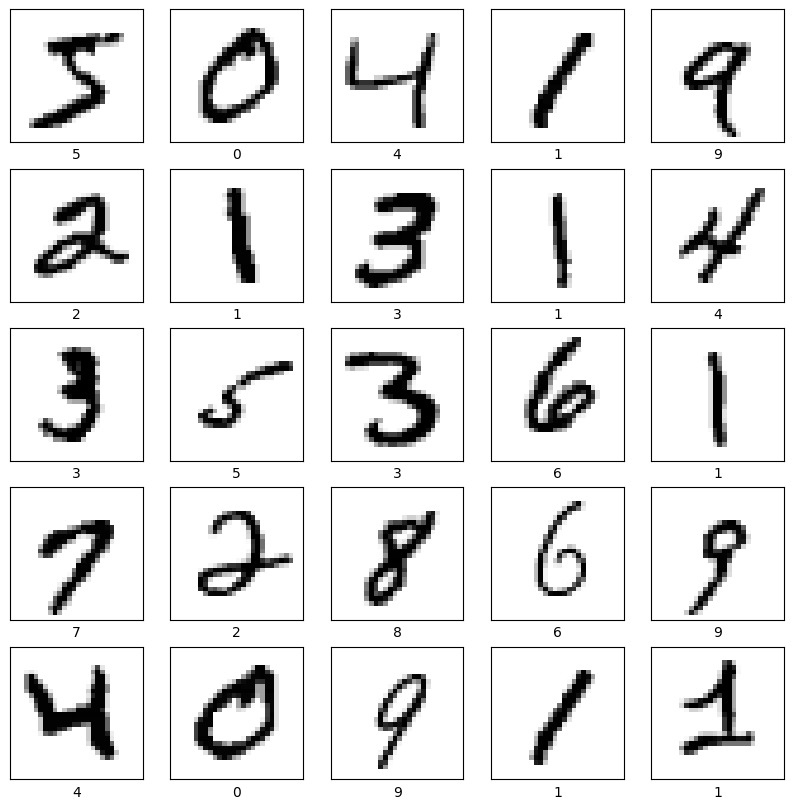

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

**[실습1] (10분) 훈련 데이터중 라벨이 2인 데이터 첫 25개를 5$\times$5 모아찍기로 출력하시오.**

TypeError: Invalid shape (784,) for image data

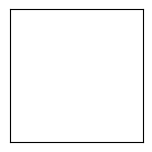

In [97]:
lst_2_idx = [i for i in range(len(train_labels)) if train_labels[i] == 2]
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[lst_2_idx[i]], cmap=plt.cm.binary)
    plt.xlabel(train_labels[lst_2_idx[i]])
plt.show()

# Sequential API

케라스에는 딥러닝 분야에서 사용되는 대부분의 층들이 클래스로 구현되어 있습니다.  
[tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers)를 확인해 보세요.

In [23]:
from keras import layers

relu층과 softmax층입니다.  
밑바닥부터 시작하는 딥러닝과 비슷하네요.  
순전파를 할때 .forward를 안붙입니다.  
왜냐하면 순전파는 특수 메서드 `__call__` 에 구현되어 있기 때문입니다.

In [24]:
relu = layers.ReLU()
print(relu(np.array([[1,-2,3,-4]])))

tf.Tensor([[1 0 3 0]], shape=(1, 4), dtype=int64)


In [25]:
softmax = layers.Softmax()
print(softmax(np.log(np.array([[2,3,5]]))))

tf.Tensor([[0.19999999 0.29999998 0.5       ]], shape=(1, 3), dtype=float32)


Affine층은 이름이 2개 더 있습니다.  
Affine layer, dense layer, fully connected layer는 모두 같은 말입니다.  
딥러닝I에서 바닥부터 구현한 다음 신경망을 케라스로 다시 구현해 보죠.  
![](https://drive.google.com/thumbnail?id=1vBEb27TDxTo9p-lMuZR8rIO377JQFSKS&sz=s4000)  
Affine층 2개는 다음과 같이 만듭니다.

In [26]:
dense1 = layers.Dense(50, input_shape=(784,))
dense2 = layers.Dense(10)

/Users/vin_ah/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


케라스는 3가지 API를 제공합니다.  
Sequential API, Functional API, Subcalssing API입니다.  
이중에 유연성은 떨어지지만 가장 사용하기 쉬운 Sequential API를 먼저 공부하겠습니다.  
위의 층들을 [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)을 이용해서 일렬로 묶을 수도 있습니다.

In [27]:
from keras import Sequential

model = Sequential([dense1, relu, dense2, softmax])

첫번째 Affine층의 가중치 행렬과 편향 벡터를 출력해 보겠습니다.  
[tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)를 보시면 가중치 행렬 초기값 디폴트 설정이 glorot_uniform으로 되어 있습니다.  
이전에 Xavier 초기값을 배웠는데요.  
Xavier의 풀네임이 Xavier Glorot입니다.  
밑바닥부터 시작하는 딥러닝에 나오는 Xavier 초기값은 사실 Lecun 초기값입니다.  
$n_{in}$을 입력 뉴런수, $n_{out}$을 입력 뉴런수라 하면 Lecun 초기값과 Xavier 초기값은 다음과 같습니다.  
- LeCun normal initialization : $W \sim N(0,{1 \over n_{in}})$
- Xavier normal initialization : $W \sim N(0,{2 \over n_{in}+n_{out}})$

말로 풀면 LeCun 초기값의 분산은 입력뉴런의 역수이고, Xavier 초기값의 분산은 입력 뉴런과 출력뉴런의 평균의 역수입니다.  

밑바닥부터 시작하는 딥러닝에서는 가중치행렬을 항상 정규분포를 따라 랜덤하게 초기화했는데 균등분포를 따라 랜덤하게 초기화 하기도 합니다.  
케라스에서는 균등분포에 따른 초기화가 디폴트입니다.  
- LeCun uniform initialization : $W \sim U(-\sqrt{3 \over n_{in}},\sqrt{3 \over n_{in}})$
- Xavier uniform initialization : $W \sim U(-\sqrt{6 \over n_{in}+n_{out}},\sqrt{6 \over n_{in}+n_{out}})$

[tf.keras.initializers](https://www.tensorflow.org/api_docs/python/tf/keras/initializers)를 참고하세요.  

---
균등분포 $U(a,b)$의 확률밀도 함수를 그래프로 그리면 아래와 같습니다.  
평균은
$$
{1 \over b-a} \int_a^b x dx = {a+b \over 2}
$$
이고 분산은
$$
\left({1 \over b-a} \int_a^b x^2 dx\right) - \left({1 \over b-a} \int_a^b x dx\right)^2 = {(b-a)^2 \over 12}
$$
입니다.  
균등분포를 따르는 LeCun 초기값과 Xavier초기값에 적용을 해보세요.  
균등분포의 경우도 LeCun 초기값의 분산은 입력뉴런의 역수이고, Xavier 초기값의 분산은 입력 뉴런과 출력뉴런의 평균의 역수임을 확인할 수 있습니다.  
![](https://drive.google.com/thumbnail?id=1iP1kmT7Cylf0kGMgKgYLcpvs7E9YkNGV&sz=s4000)

In [28]:
print(model.layers[0].weights)

[<KerasVariable shape=(784, 50), dtype=float32, path=sequential/dense/kernel>, <KerasVariable shape=(50,), dtype=float32, path=sequential/dense/bias>]


[summary](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#summary) 메서드를 통해 신경망 정보를 요약해서 볼수 있습니다.  
배치 개수는 신경망과 독립적으로 우리가 원하는 값을 나중에 학습할때 선택할수 있기 때문에 None으로 나옵니다.  
첫번째 Affine층은 학습해야할 파라미터 개수가 $784 \times 50 + 50 = 39,250$개이고 두번째 Affine층은 학습해야할 파라미터 개수가 $50 \times 10 +10 = 510$개입니다.  
Non-trainable parmas는 업데이트하지 않고 고정시켜놓는 파라미터를 뜻합니다.  
나중에 전이학습을 공부할때 필요합니다.

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

[tf.keras.utils.plot_model](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model)을 이용하면 신경망 구성을 시각화 할수 있습니다.

* graphviz 설치 후 경로 추가 설정 필요 (!pip install pydot pydotplus graphviz)


In [30]:
# !pip install pydot 
# !pip install pydot pydotplus graphviz
# !pip install pydotplus

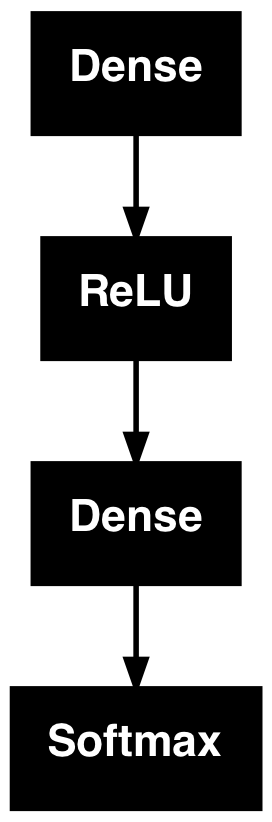

In [31]:
from tensorflow.keras.utils import plot_model

plot_model(model)

입력데이터의 shape과 출력 데이터의 shape도 표시할수 있습니다.

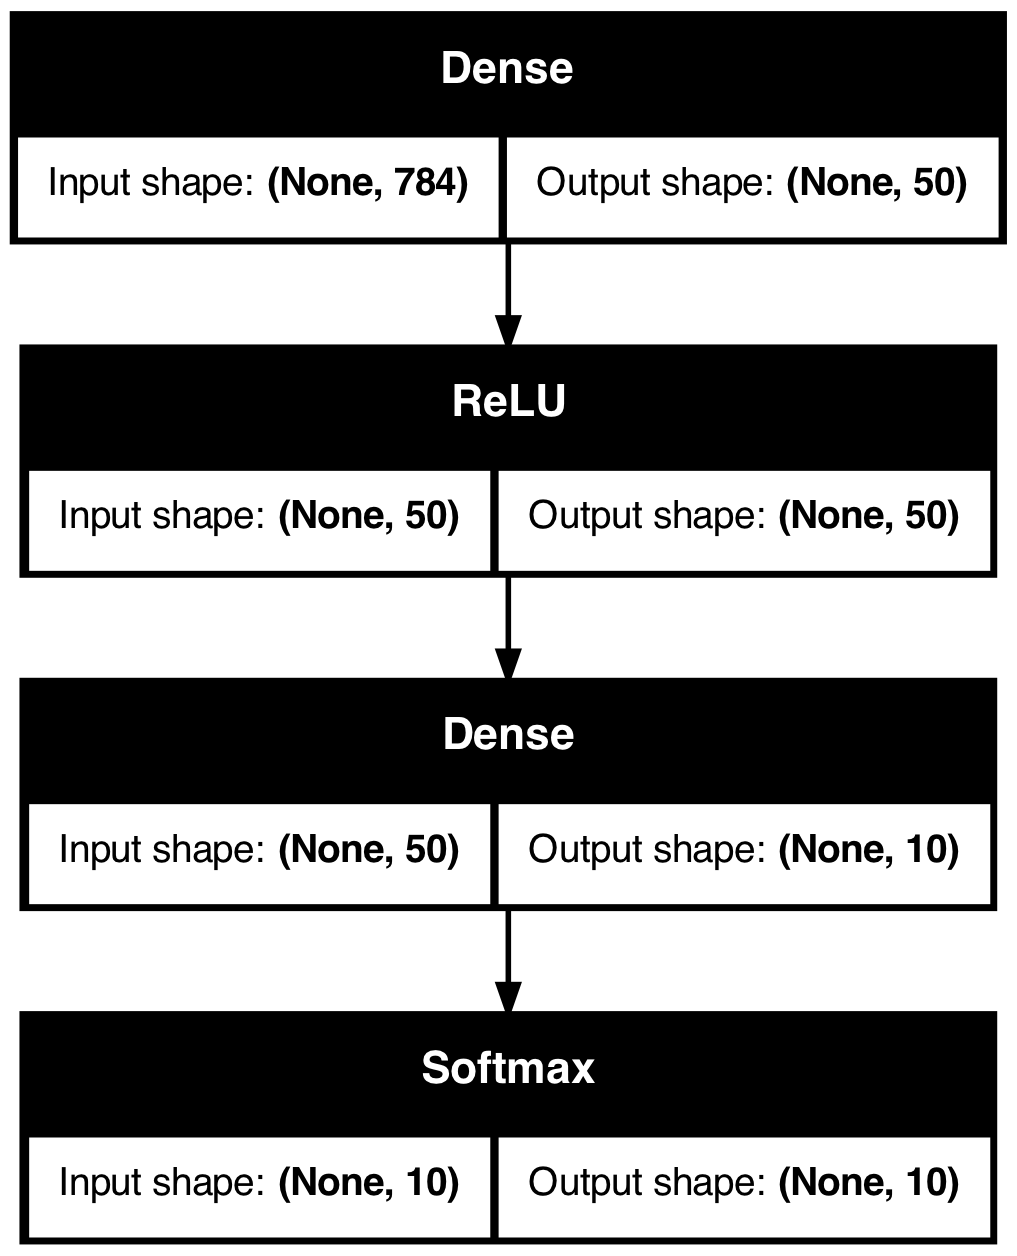

In [32]:
plot_model(model, show_shapes=True)

relu층과 softmax층은 위와 같이 층을 따로 만들기 보다는 다음과 같이 [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) 클래스의 인수로 설정해서 구성하는 것이 통상적입니다.

In [33]:
model = Sequential([
    layers.Dense(50, input_shape=(784,), activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

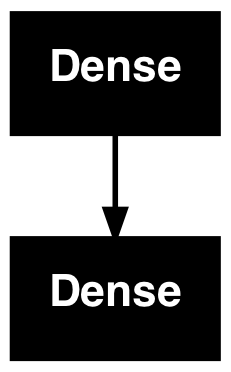

In [35]:
plot_model(model)

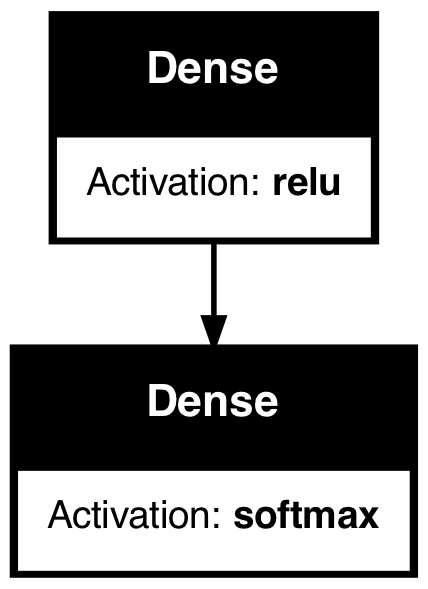

In [36]:
plot_model(model, show_layer_activations=True)

딥러닝I에서 우리는 중간고사까지 활성화 함수로 sigmoid함수를 사용했었습니다.

In [37]:
model_sig = Sequential([
    layers.Dense(50, input_shape=(784,), activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

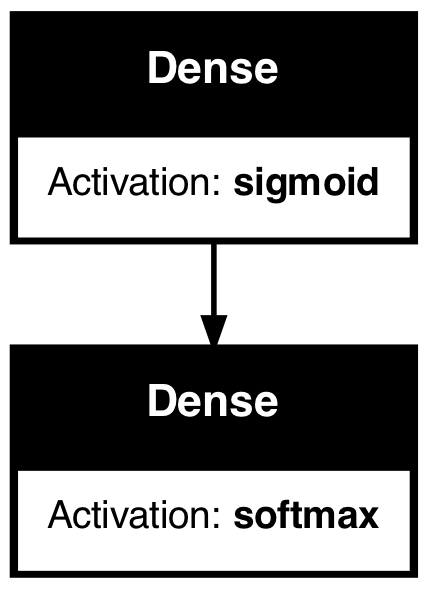

In [38]:
plot_model(model_sig, show_layer_activations=True)

입력 뉴런 수를 지정하지 않을 수도 있습니다.  
입력 이미지의 해상도에 독립적인 신경망 구성입니다.  
이때는 summary나 plot_model이 적용되지 않고 가중치도 초기화되지 않습니다.  
데이터가 입력되는 순간 입력 뉴런수가 결정되고 가중치도 초기화됩니다.

In [39]:
model_free = Sequential([
    layers.Dense(50, activation="relu"),
    layers.Dense(10, activation="softmax")
])

print(model_free.layers[0].weights)
print(model_free.layers[1].weights)

[]
[]


딥러닝1에서 맨 처음 본 의미있는 신경망은 저자가 학습시켜놓은 다음과 같은 신경망이었습니다.  
활성화 함수는 sigmoid함수였습니다.  
![](https://drive.google.com/thumbnail?id=1aczMXZvo2PbHAj53Ld00ZcMEq7zDXV_S&sz=s4000)

**[실습2] (5분) 위 신경망을 Sequential API로 구성하고 summary와 plot_model을 출력하시오. 모델 이름은 본인의 이니셜로 지으시오.**

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 98)             │        76,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 27)             │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,217 (305.54 KB)

 Trainable params: 78,217 (305.54 KB)

 Non-trainable params: 0 (0.00 B)

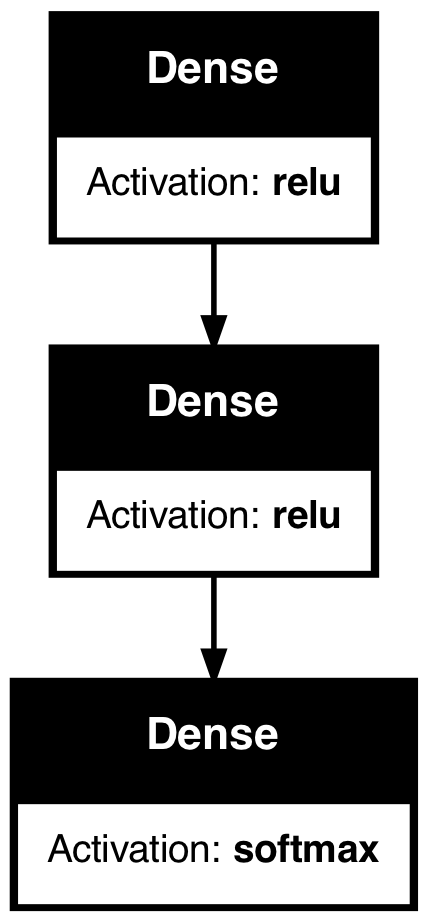

In [43]:
vin_model = Sequential([
	layers.Dense(98, input_shape=(784,), activation="relu"),
	layers.Dense(10, activation="relu"),
	layers.Dense(27, activation="softmax")
])

vin_model.summary()
plot_model(vin_model, show_layer_activations=True)

# 학습

학습설정은 [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile) 메서드로 해줍니다.  
딥러닝I과 같이 옵티마이저는 SGD, 손실함수는 교차 엔트로피, 평가지표는 accuracy로 하겠습니다.  
`sparse_categorical_crossentropy`는 라벨이 정수일때 사용하고 `categorical_crossentropy`는 라벨이 원 핫 인코딩되어 있을때 사용합니다.

In [44]:
model = Sequential([
    layers.Dense(50, input_shape=(784,), activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="SGD",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

각 데이터를 flatten하고  0과 1 사이로 리스케일링 해줍시다.

In [45]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images / 255

[fit](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit) 메서드로 학습을 시킵니다.

In [46]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.4773 - loss: 1.7216
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.8432 - loss: 0.6481
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.8724 - loss: 0.4853
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.8887 - loss: 0.4157
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.8973 - loss: 0.3779


**[실습 3] (5분) 리스케일링하지 않은 데이터로 학습시켜보시오.**

In [48]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))


model = Sequential([
    layers.Dense(50, input_shape=(784,), activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="SGD",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.1747 - loss: 470.9604
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.3049 - loss: 1.8657
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.3466 - loss: 1.7273
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.3541 - loss: 1.6818
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.3621 - loss: 1.6397


우리가 공부한 옵티마이저 RMSprop은 초반에 큰 보폭으로 학습이 진행되다가 학습이 많이 진행된 파라미터에 대해서는 보폭이 많이 줄어듭니다.  
이때문에 학습 초기에 빠른 학습이 가능합니다.  
사실 AdaGrad가 이 아이디어에 기반한 옵티마이저인데 나중에 보폭이 너무 작아져서 학습이 정체되는 문제가 발생합니다.  
이를 개량한 옵티마이저가 RMSprop입니다.

In [49]:
model = Sequential([
    layers.Dense(50, input_shape=(784,), activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="RMSprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images / 255

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.8205 - loss: 0.6789
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9363 - loss: 0.2203
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.9520 - loss: 0.1691
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.9582 - loss: 0.1431
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9641 - loss: 0.1227


`to_categorical` 함수를 써서 라벨을 원 핫 인코딩을 할수 있습니다.

In [50]:
from tensorflow.keras.utils import to_categorical

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

print(train_labels_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


이때는 손실함수 설정을 `categorical_crossentropy`로 해야 합니다.

In [ ]:
model = Sequential([
    layers.Dense(50, input_shape=(784,), activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="RMSprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels_one_hot, epochs=5, batch_size=128)

[fit](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit) 메서드는 학습 과정이 기록된 객체를 리턴합니다.

In [ ]:
model = Sequential([
    layers.Dense(50, input_shape=(784,), activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="RMSprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=5, batch_size=128) # 학습 기록

print("\n")
print(history.history)

우리가 공부했던 SGD, Momentum, Nesterov, Adagrad, RMSprop, Adam는 모두 케라스에 구현되어 있습니다.  
[tf.keras.optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)를 참고하세요.  
옵티마이저에는 설정해야할 여러 하이퍼파라미터들이 있습니다.  
Momentum은 관성계수, RMSprop은 forgetting factor (decay rate), Adam은 편향을 보정해주는 $\beta_1$, $\beta_2$가 있죠.  
물론 학습률은 가장 기본적인 하이퍼파라미터입니다.  
위에서는 디폴트 값을 사용했습니다.  
예를 들어 SGD의 학습률은 디폴트 값이 0.01입니다.  
본인이 원하는 값을 직접 지정하려면 다음과 같이 합니다.

In [ ]:
model = keras.Sequential([
    layers.Dense(50, input_shape=(784,), activation="relu"),
    layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.SGD(learning_rate=1.)

model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=128)

**[실습4] (5분) 2번문제에서 본인 이니셜을 딴 신경망을 학습시키시오. 학습회수와 옵티마이저는 알아서 선택하시오.**

In [54]:
vin_model = Sequential([
	layers.Dense(98, input_shape=(784,), activation="relu"),
	layers.Dense(10, activation="relu"),
	layers.Dense(27, activation="softmax")
])

vin_model.compile(optimizer='Adam',
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

vin_model.fit(train_images, train_labels, epochs=50, batch_size=256)

history = vin_model.fit(train_images, train_labels, epochs=50, batch_size=256) # 학습 기록

/Users/vin_ah/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5750 - loss: 1.5119
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9234 - loss: 0.2741
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9464 - loss: 0.1899
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9562 - loss: 0.1522
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9615 - loss: 0.1317
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9696 - loss: 0.1058
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9729 - loss: 0.0917
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9769 - loss: 0.0800
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9781 - loss: 0.0728
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9813 - loss: 0.0644
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9833 - loss: 0.0573
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [62]:
test_loss, test_acc = vin_model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.9755 - loss: 0.1878


In [ ]:
pred = vin_model.predict(test_images)

# 평가 및 예측

[evaluate](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#evaluate) 메서드와 테스트 데이터로 모델의 성능을 평가해보죠.  
케라스 창시자에게 배우는 딥러닝 코드에서는 은닉층의 뉴런수를 512개로 두텁게 만들었고 옵티마이저로 RMSprop을 사용했습니다.  
![](https://drive.google.com/thumbnail?id=1xa4LMpWL7VgpxZc_sQZZbDnAOjhF-Rum&sz=s4000)

In [63]:
model = keras.Sequential([
    layers.Dense(512, input_shape=(784,), activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="RMSprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\n")
print(f"test_acc: {test_acc}")

/Users/vin_ah/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8719 - loss: 0.4457
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9668 - loss: 0.1163
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9790 - loss: 0.0712
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9850 - loss: 0.0494
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9895 - loss: 0.0365
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.9734 - loss: 0.0828


test_acc: 0.9771999716758728


[predict](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#predict) 메서드로 예측을 할수 있습니다.
확률분포를 출력합니다.

In [65]:
predictions = model.predict(test_images)
print(predictions[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
[1.5149627e-07 1.2040606e-08 1.9388721e-05 3.6267022e-04 2.6250413e-10 4.6019405e-08 2.0474531e-12 9.9959999e-01 8.6370036e-08 1.7497599e-05]


맨 처음 등장하는 테스트 이미지를 확신에 차서 7이라고 대답했는데 맞았네요.

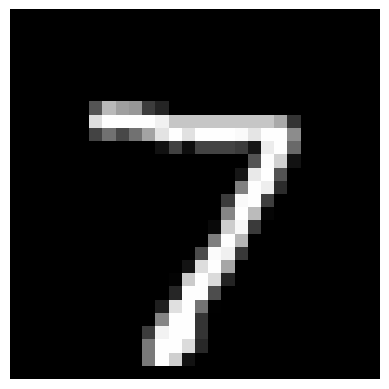

In [66]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(test_images[0].reshape(28,28), cmap=plt.cm.gray)
plt.show()

 confusion matrix입니다.

In [67]:
confusion = np.zeros((10,10), dtype=int)

for k in range(len(test_images)):
    i = test_labels[k]
    j = np.argmax(predictions[k])
    confusion[i][j] += 1

print(confusion)

[[ 967    0    3    1    0    0    6    1    1    1]
 [   0 1124    3    2    0    0    2    0    4    0]
 [   0    4 1014    5    0    0    1    2    6    0]
 [   0    0    3  998    0    1    0    2    3    3]
 [   1    0    6    0  958    0    6    1    3    7]
 [   2    0    0   19    1  849    7    1   11    2]
 [   1    3    2    1    1    2  944    0    4    0]
 [   1    4   10    2    0    0    0 1001    5    5]
 [   1    0    4    7    2    0    2    3  954    1]
 [   2    5    1   12   10    1    2    6    7  963]]


머신러닝 시간에 배운 싸이킷런을 사용하면 confusion matrix를 쉽게 얻을 수 있습니다.

In [68]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
print(confusion)

[[ 967    0    3    1    0    0    6    1    1    1]
 [   0 1124    3    2    0    0    2    0    4    0]
 [   0    4 1014    5    0    0    1    2    6    0]
 [   0    0    3  998    0    1    0    2    3    3]
 [   1    0    6    0  958    0    6    1    3    7]
 [   2    0    0   19    1  849    7    1   11    2]
 [   1    3    2    1    1    2  944    0    4    0]
 [   1    4   10    2    0    0    0 1001    5    5]
 [   1    0    4    7    2    0    2    3  954    1]
 [   2    5    1   12   10    1    2    6    7  963]]


시각화 시간에 배운 seaborn을 이용해서 멋지게 표현해보죠.

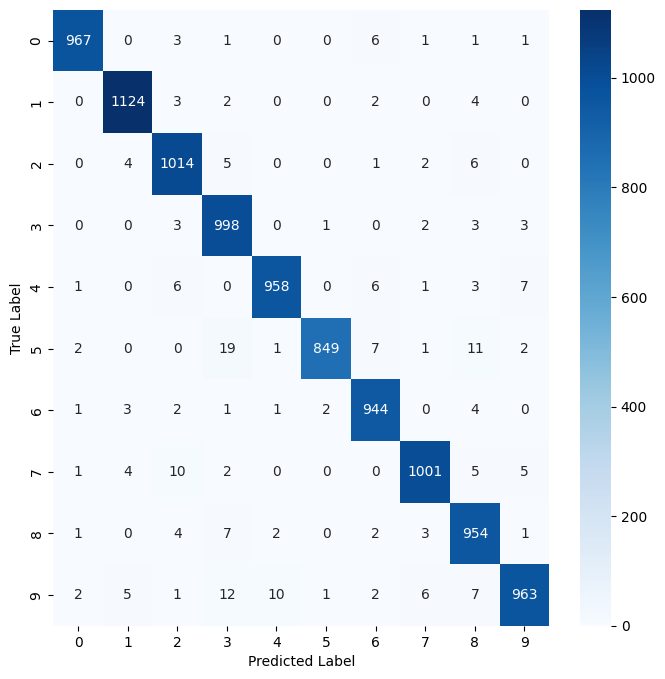

In [69]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

싸이킷런을 사용해서 머신러닝 시간에 배운 Precision, Recall, F1-Score를 출력해보죠.  
- TP : True Posive, FP : False Positive, TN : True Negative, FN : False Negative
- $\rm Precision = {TP \over TP+FP}$
- $\rm Recall = {TP \over TP+FN}$
- $\rm {1 \over F1-Score} = {1 \over 2}\left({1 \over Precision} + {1 \over Recall}\right)$
- support : 라벨 개수

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, np.argmax(predictions, axis=1)))

In [71]:
vin_model = Sequential([
	layers.Dense(98, input_shape=(784,), activation="relu"),
	layers.Dense(10, activation="relu"),
	layers.Dense(27, activation="softmax")
])

vin_model.compile(optimizer='Adam',
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

vin_model.fit(train_images, train_labels, epochs=50, batch_size=256)

predictions = vin_model.predict(test_images)


/Users/vin_ah/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4999 - loss: 1.9308
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9190 - loss: 0.2889
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9453 - loss: 0.1926
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9580 - loss: 0.1488
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9653 - loss: 0.1214
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9706 - loss: 0.1044
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9750 - loss: 0.0886
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9781 - loss: 0.0768
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9799 - loss: 0.0684
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9822 - loss: 0.0628
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9846 - loss: 0.0548
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

**[실습5] (5분) 4번에서 학습시킨 본인 이니셜을 딴 신경망을 테스트 데이터로 평가하시오. confusion matrix와 Presisioin, Recall, F1-Score를 출력하시오.**

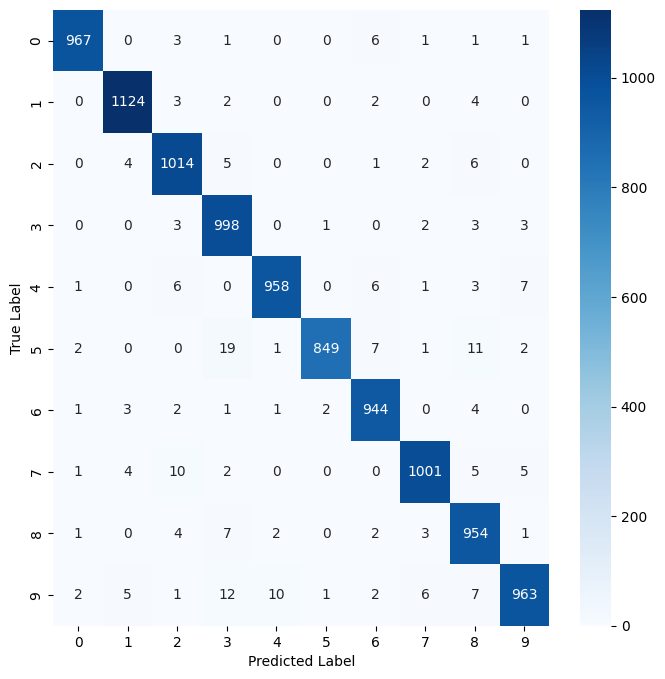

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.99      0.96      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [79]:
import seaborn as sns
from sklearn.metrics import classification_report

plt.figure(figsize=(8,8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(test_labels, np.argmax(predictions, axis=1)))

**[과제1] (i) 신경망이 99프로 이상의 확신을 가지고 맞춘 이미지가 몇 프로인지 구하고 첫 25장의 이미지를 $5 \times 5$ 테이블로 출력하시오. 이미지 밑에는 라벨을 표시하시오.**

99% 이상의 확신을 갖고 맞춘 이미지 : 94.01%


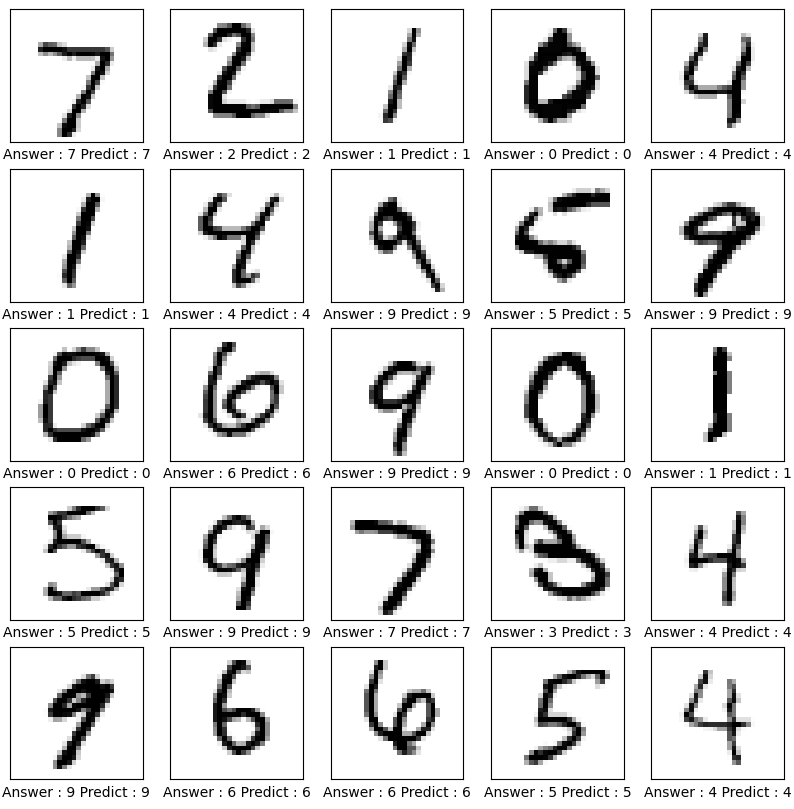

In [115]:
idx_lst = []

for i in range(len(predictions)):
	pred = max(predictions[i])
	pred_idx = np.argmax(predictions[i], axis=0)
	if pred >= 0.99 and pred_idx == test_labels[i]:
		idx_lst.append(i)

print(f'99% 이상의 확신을 갖고 맞춘 이미지 : {round(len(idx_lst)/10000, 4)*100}%')

plt.figure(figsize=(10,10))

# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

for i in range(25):
	plt.subplot(5,5,i+1)
	plt.xticks([])
	plt.yticks([])
	plt.imshow(test_images[idx_lst[i]], cmap=plt.cm.binary)
	plt.xlabel(f'Answer : {test_labels[idx_lst[i]]} Predict : {np.argmax(predictions[idx_lst[i]])}')
	# plt.xlabel(test_labels[idx_lst[i]])
plt.show()

**(ii) 신경망이 60프로 미만의 아리송하게 맞춘 이미지가 몇프로 인지 구하고 첫 25장의 이미지를 $5 \times 5$ 테이블로 출력하시오. 이미지 밑에는 라벨을 표시하시오.**

60% 미만의 확신을 갖고 맞춘 이미지 : 0.24%


IndexError: list index out of range

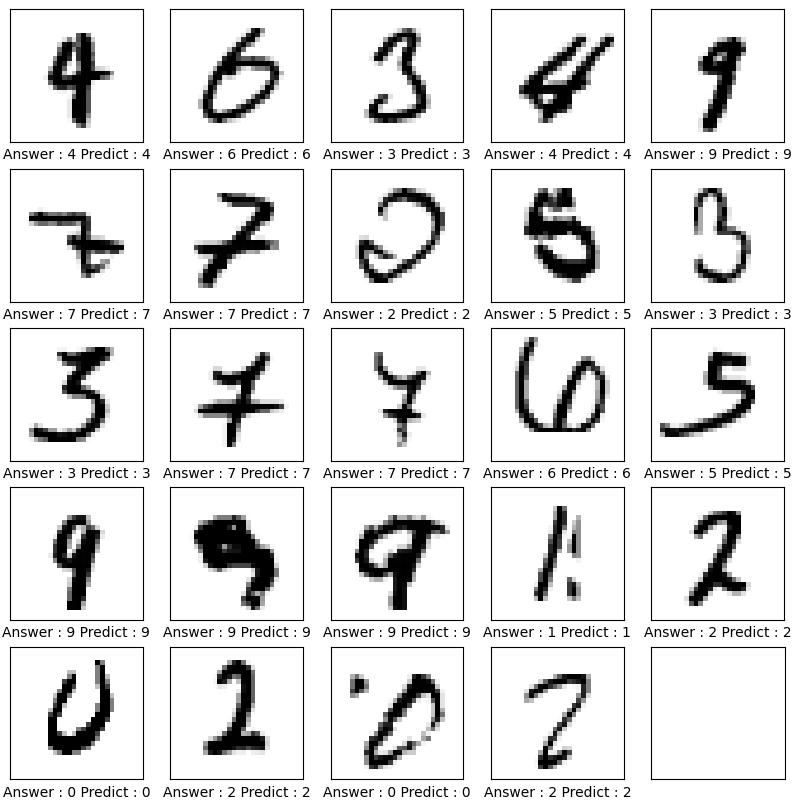

In [114]:
idx_lst = []

for i in range(len(predictions)):
	pred = max(predictions[i])
	pred_idx = np.argmax(predictions[i], axis=0)
	if pred < 0.6 and pred_idx == test_labels[i]:
		idx_lst.append(i)

print(f'60% 미만의 확신을 갖고 맞춘 이미지 : {round(len(idx_lst)/10000, 4)*100}%')

plt.figure(figsize=(10,10))

# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

for i in range(25):
	plt.subplot(5,5,i+1)
	plt.xticks([])
	plt.yticks([])
	plt.imshow(test_images[idx_lst[i]], cmap=plt.cm.binary)
	# plt.xlabel(test_labels[idx_lst[i]])
	plt.xlabel(f'Answer : {test_labels[idx_lst[i]]} Predict : {np.argmax(predictions[idx_lst[i]])}')
plt.show()

**(iii) 신경망이 90프로 이상의 확신을 가지고 대답했으나 틀린 이미지가 몇프로 인지 구하고 첫 25장의 이미지를 $5 \times 5$ 테이블로 출력하시오. 이미지 밑에는 라벨과 신경망이 답한 숫자를 표시하시오. 신경망이 왜 이렇게 대답했을지 설명하시오.**

90% 이상의 확신을 가졌지만, 틀린 이미지 : 1.32%


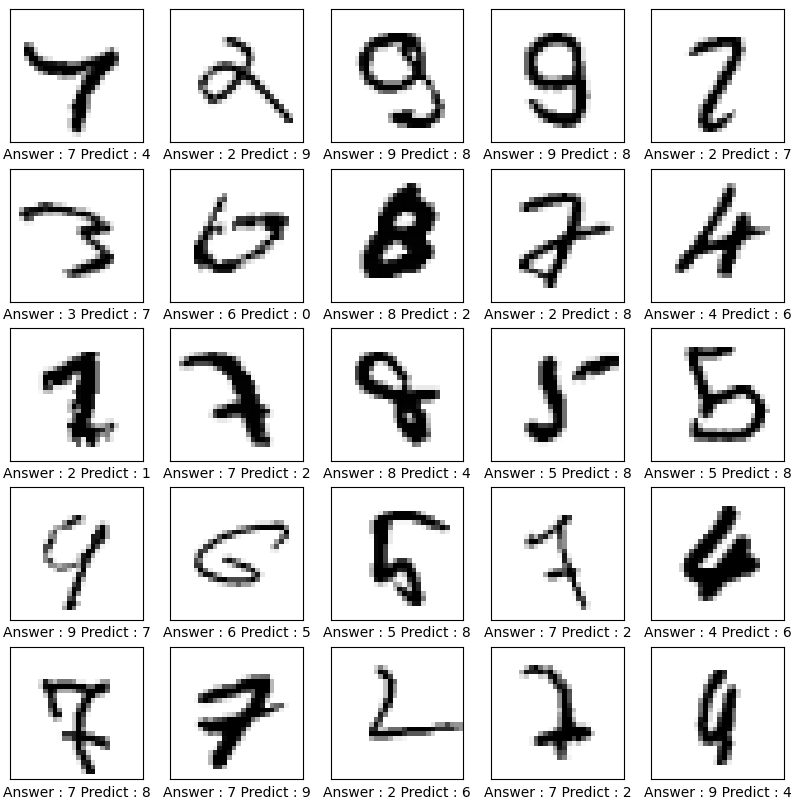

In [116]:
idx_lst = []

for i in range(len(predictions)):
	pred = max(predictions[i])
	pred_idx = np.argmax(predictions[i], axis=0)
	if pred >= 0.9 and pred_idx != test_labels[i]:
		idx_lst.append(i)

print(f'90% 이상의 확신을 가졌지만, 틀린 이미지 : {round(len(idx_lst)/10000, 4)*100}%')

plt.figure(figsize=(10,10))

# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[idx_lst[i]], cmap=plt.cm.binary)
    plt.xlabel(f'Answer : {test_labels[idx_lst[i]]} Predict : {np.argmax(predictions[idx_lst[i]])}')
plt.show()

**[과제2] (i) 리스케일링한 테스트 데이터에 평균은 0이고 표준편차는 $\sigma$인 정규분포를 따른 노이즈를 더해서 첫 25장의 이미지를 $5 \times 5$ 테이블로 출력하시오. ($\sigma=0.1,0.2,0.5$)**

In [ ]:
np.random.seed(seed=0)
norm = np.random.normal(size=1)

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images / 255
test_images = test_images + norm

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

**(ii) 리스케일링한 MNIST 테스트 데이터에 평균은 0이고 표준편차는 $\sigma$인 정규분포를 따른 노이즈를 더해서 각각 정확도를 구하시오. ($\sigma=0.1,0.2,0.5$)**

**[과제3] (i) MINST 테스트 데이터 이미지를 오른쪽으로 $k$ 픽셀만큼, 위로 $k$ 픽셀만큼 이동시킨 후 첫 25장의 이미지를 출력하시오. ($k=1,2,3$)**

**(ii) 평행이동 시킨 데이터들에 대하여 정확도를 측정하시오.**

**(iii) MINST 훈련 데이터 이미지를 오른쪽으로 $k$ 픽셀만큼, 위로 $k$ 픽셀만큼 이동시킨 후 ($k=1,2,3$) 기존의 훈련 데이터와 묶어서 240,000개의 훈련 데이터로 증강하시오. (힌트 : [np.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html))**

**(iv) 증강된 데이터로 신경망을 훈련시킨후 (ii)에서 평행이동 시킨 테스트 데이터에 대해 정확도를 다시 측정하시오.**

**[과제4] (i) 훈련 데이터와 라벨을 0부터 9까지 오름차순으로 정렬하시오. 정렬된 훈련 데이터의 라벨을 출력하시오.  
(힌트 : [argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) ; 주의 : 테스트 데이터는 수정하지 마시오)**

**(ii) 평가 및 예측 섹션처럼 신경망을 구성, 학습, 평가하되 [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) 메서드에 `shuffle` 인수를 False로 꺼놓고 정렬된 데이터로 학습시키시오. 테스트 데이터의 정확도를 출력하시오.**
![](https://drive.google.com/thumbnail?id=1xa4LMpWL7VgpxZc_sQZZbDnAOjhF-Rum&sz=s4000)

**(iii) confusion matrix를 출력하시오.**

**(iv) 훈련 데이터와 라벨을 내림차순으로 정렬한후 (ii), (iii)을 반복하시오. (힌트 : `[::-1]`)**

**(v) 데이터를 섞지 않으면 신경망이 어떤 방식으로 학습하길래 위와 같은 결과가 나오는지 설명하시오.**